In [11]:
import anchor
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.1.5


In [2]:
from anchor.anchor_image import AnchorImage

In [3]:
from keras.applications import inception_v3 as inc_net


Using TensorFlow backend.


In [5]:
inet_model = inc_net.InceptionV3()

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

40960/35363 [==================================] - 0s 3us/step
('n02133161', 'American_black_bear', 0.63716)
('n02105056', 'groenendael', 0.031818103)
('n02104365', 'schipperke', 0.029944422)
('n01883070', 'wombat', 0.028509434)
('n01877812', 'wallaby', 0.0250936)


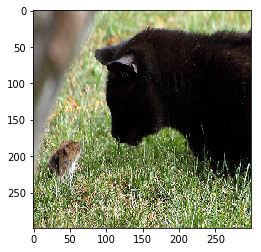

In [12]:
images = transform_img_fn([os.path.join("..", 'cat_mouse.jpg')])


# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [15]:
from lime import lime_image

In [17]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=100)

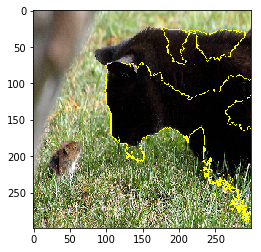

In [19]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(295, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


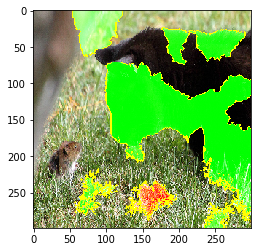

In [21]:

temp, mask = explanation.get_image_and_mask(295, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [26]:
from anchor.anchor_image import AnchorImage
explainer = AnchorImage()
explanation = explainer.explain_instance(images[0], inet_model.predict, coverage_samples=1000, batch_size=10)

True pred 295


KeyboardInterrupt: 